In [1]:
#Biblioteca para leer y trabajar con archivos csv
import pandas as pd 
#Biblioteca para utilizar expresiones regulares
import re 
#biblioteca para trabajar con lenguaje natural
import nltk 
#modulos para la eliminacion de palabras vacias
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
#biblioteca para poder manipular de mejor manera los objetos de tipo string
import string
#modelo de nltk para poder tokenizar frases
from nltk.tokenize import word_tokenize
#modelo para poder lemmatizar frases
from nltk.stem.wordnet import WordNetLemmatizer
#modulos para poder 
from collections import Counter
#biblioteca de modulos estadisticos
from statistics import mode
#modulo de nltk para lemmatizar palabras
from nltk.stem.wordnet import WordNetLemmatizer
#modulo para crear dataframe
from pandas import DataFrame
#modulo para trabajar con operaciones matematicas
import numpy as np
#Visualizacion
import plotly.express as px
import plotly.graph_objects as go 
import matplotlib.pyplot as plt
import seaborn as sns
pip install wordcloud


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mjsto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mjsto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Tendencias de YouTube USA

El conjunto de datos de tendencias de YouTube es un conjunto de datos extraido de Kagle que contiene las tendencias de Youtube entre el 2017 y el 2018, contiene 40949 filas y 16 columnas entre las que destacan el nombre del video, su descripcion, la hora en la que se publico, id del video, la categoria del video, los likes, las vistas, el link del video entre otras. Contiene solo 570 registros nulos en la columna de descripcion


In [305]:
df_usa= pd.read_csv("USvideos.csv")
df_usa.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


Se desea analizar el conjunto de datos por lo que se tiene que realizar un preprocesamiento de estos para posteriormente entrenar algunos modelo de ML, entre este preprocesamiento se realizara limpieza de texto en las columnas de titulo y descripcion  

### Funciones de Limpieza de los datos 

Para el objetivo del proyecto solo utilizaremos las columnas de descripcion y titulo por lo cual las funciones de limpieza de datos solo estaran enfocadas en la limpieza de texto 

In [3]:
def limpieza(columna):
    #convertir a string cualquier objeto
    columna = columna.astype(str)
    #convertir a minusculas
    columna = columna.map(lambda x: x.lower())
    #remover numeros
    columna = columna.map(lambda x: re.sub(r'\d+', '', x))
    #remover signos de puntuacion
    columna = columna.map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
    #remover espacios en blanco
    columna = columna.map(lambda x: x.strip())
    #tokenizar 
    columna = columna.map(lambda x: word_tokenize(x))
    #quitar tokens no alfabeticos 
    columna = columna.map(lambda x: [word for word in x if word.isalpha()])
    #quitar stop words
    stop_words = set(stopwords.words('english'))
    columna = columna.map(lambda x: [w for w in x if not w in stop_words])
    #lemmatizar
    lem = WordNetLemmatizer()
    columna = columna.map(lambda x: [lem.lemmatize(word) for word in x])
    #convertir lista a string
    columna = columna.map(lambda x: ' '.join(x))
    return columna 

In [4]:
def limpieza2(texto):
    #convierte el texto a minusculas
    texto = texto.lower()
    #quita los hipervinculos
    texto = re.sub(r'https?:\/\/.*[\r\n]*', '', texto, flags=re.MULTILINE)
    #las funciones con replace, reemplazan unos valores por otros
    texto = texto.replace(",","")
    texto = texto.replace(".","")
    texto = texto.replace("?","")
    texto = texto.replace("¿","")
    texto = texto.replace('“',"")
    texto = texto.replace('”',"")
    texto = texto.replace(':',"")
    texto = texto.replace("-","")
    texto = texto.replace("!","")
    texto = texto.replace("¡","")
    texto = texto.replace("á","a")
    texto = texto.replace("é","e")
    texto = texto.replace("í","i")
    texto = texto.replace("ó","o")
    texto = texto.replace("ú","u")
    texto = texto.replace("|","")
    texto = texto.replace("(","")
    texto = texto.replace(")","")
    texto = texto.replace("*","")
    #reemplaza caracteres extraños 
    texto = re.sub(r"[-()\"#/@;:<>{}=~|.?,]", "", texto)
    texto = texto.lower()
    #elimina caracteres no alfabeticos como numeros
    texto = re.sub(r"[^a-z ]","",texto)
    texto = re.sub(r" +", " ", texto)
    return texto

In [5]:
#La funcion de tokenizar nos permite tokenizar nuestras frases en palabras es decir divide 
#las frase en palabras devolviendo una lista  con las palabras que conforman a la frase
def tokenizador(sentence):
    tokenizada = nltk.word_tokenize(sentence)
    return tokenizada

In [6]:
#la funcion eje_limpieza ejecuta la funcion de limpieza2  sobre una columna, con un preprocesamiento previo para 
#el funcionamiento de limpieza2 ya que primero convierto todos los caracteres
#en valores de tipo string esto se debe a que al haber hipervinculos estos son detectados como
#objetos de tipo float lo cual evita que la funcion limpieza2 funcione, despues de convertir
#todos los valores a valores de tipo string esta funcion convierte la columna en una lista,
#despues hace uso de limpieza2 para limpiar el texto y despues tokeniza las palabras limpias para 
#crear una lista de listas donde cada sublista es un renglon de la columna original 
def eje_limpieza(columna):
    columna = columna.astype(str)
    lista = columna.tolist()
    limpia =[]
    for i in lista:
        limpia.append(limpieza2(i))
    lista_tokenizada = []
    for i in limpia:
        lista_tokenizada.append(tokenizador(i))
    
    return lista_tokenizada
    

## Seleccionando los atributos a utilizar

Como queremos afrontar este problema como un problema de clasificacion solo seleccione las columnas de titulo, descripcion, categoria y fecha. Ya que estas son las unicas de interés para resolver mi hipotesis 


In [11]:
#Creo un dataframe apartir del set original solo con las columnas que son de mi interes para el problema
#de clasificacion
dfyu = pd.DataFrame()
dfyu["titulo"] = df_usa.title
dfyu["descripcion"]= df_usa.description
dfyu["id_categoria"]= df_usa.category_id
dfyu["fecha"] = df_usa.publish_time

## Preprocesar los datos

In [12]:
#eliminamos valores duplicados
dfyu = dfyu.dropna()

In [9]:
#Limpiamos las dos columnas con la funcion limpieza para asi tener texto limpio con el 
#menor ruido posible y que este sea de los mas exacto posible
dfyu['titulo']= limpieza(dfyu.titulo)
dfyu['descripcion']=limpieza(dfyu.descripcion)

In [10]:
dfyu.descripcion.head()

0    shantells channel httpswwwyoutubecomshantellma...
1    one year presidential election john oliver dis...
2    watch previous video nnsubscribe httpswwwyoutu...
3    today find link nickelback amateur secret nick...
4    know since show back might best episode yetnle...
Name: descripcion, dtype: object

Observamos algo bastante interesnate y es que la funcion de limpieza hace bien todas las tareas excepto la de eliminar hipervinculos es por ello que implemente la funcion de limpieza2 la cual si elimina los hipervinculos para esto cabe mencionar que es necesario que limpieza2 se ejecute antes de limpieza ya que si se ejecuta antes los hipervinculos se haran del tipo string y la funcion de limpieza2 no sera efectiva, esto solo es necesario para la columna de descripcion ya que la columna de titulo no contiene hipervinculos

In [13]:
#ejecutamos la funcion de eje_limpieza
comparacion = eje_limpieza(dfyu.descripcion)
comparacion[0]

['shantells', 'channel']

Como podemos ver ahora los hipervinculos estan eliminados y podemos seguir adelante sin embargo la funcion de eje_limpieza como mencionamos anteriormente devuelve una lista de listas, entonces es necesario unir esas listas de listas antes de que asignemos estas a la columna de nuestro df a utilizar

In [14]:
dfyu["descripcion"]= comparacion
#la funcion lambda une las listas de lista en una lista y de esa forma cada lista de listas se vuelve una frase 
#para que esa frase sea asignada a un renglon de la columna de descripcion 
dfyu["descripcion"]= dfyu.descripcion.map(lambda x: ' '.join(x))

Una vez que hemos limpiado la descripcion con la funcion de limpieza2, limpiare la columna de titulo como la de descripcion, la de descripcion la limpiare solo para rectificar ya que la funcion de limpieza es mas exacta

In [15]:
dfyu['titulo']= limpieza(dfyu.titulo)
dfyu['descripcion']=limpieza(dfyu.descripcion)

In [16]:
dfyu.head(3)

,titulo,descripcion,id_categoria,fecha
0,want talk marriage,shantells channel,22,2017-11-13T17:13:01.000Z
1,trump presidency last week tonight john oliver...,one year presidential election john oliver dis...,24,2017-11-13T07:30:00.000Z
2,racist superman rudy mancuso king bach lele pons,watch previous video nnsubscribe,23,2017-11-12T19:05:24.000Z


Como podemos ver ahora ya tenemos tanto la columna de descripcion como la de titulo con textos limpios, sin hipervinculos, numeros, caracteres extraños, todo en minusculas, ademas de estar lemmatizadas lo cual agrega robustes a los modelos ya que no tendremos las variaciones por ejemplo de brincando y brincar ambas palabras seran brincar

**Estableciendo un nombre a las categorias**

Tenemos cerca de 20 id_categoria sin embargo tenemos algunas valores atipicos por ejemplo tenemos el genero de sports con dos distintos id_categoria por lo que hice un diccionario para de esta forma eliminar esos valores atipicos

In [17]:
diccionario = {1:"Film and Animation", 2: "Cars and Vehicles",
              10:"Music",15:"Pets and Animals",17:"Sports",
              18:"Short Movies",19:"Travel and Vlogs",20:"gaming",
              21:"videoblogging", 22:"People and blogs",23:"Comedy",
              24:"Entertainment",25:"News ans Politic", 26:"howto and style",
              27:"education",28:"science and technology", 29:"nonprofits activism",
              30:"movies",31:"anime and animation", 32:"action and adventure",
              33:"classics", 34:"comedy",35:"documentary",36:"drama",
              37:"family",38:"foregein",39:"horror",40:"fantasy"}

Una vez creado el diccionario, creare dos nuevas columnas para mi df un es la de categoria que contiene el nombre de la categoria utilizando el diccionario, la segunda columna la crearemos uniendo el texto de titulo mas el texto de la descripcion

In [18]:
#creamos la columna categoria mapeando id_categoria y comparandola con el diccionario de esa forma cada id_categoria tiene
#la categoria que le corresponde
dfyu["categoria"] = dfyu['id_categoria'].map(diccionario)
#la columna titulo + descripcion solo se genera sumando los valores de ambas columnas
dfyu["Titulo + Descripcion"] = dfyu["titulo"] + " " + dfyu["descripcion"]

In [19]:
#eliminamos la columna de id_categoria ya que no es relevante 
del dfyu["id_categoria"]

In [20]:
dfyu.head(3)

,titulo,descripcion,fecha,categoria,Titulo + Descripcion
0,want talk marriage,shantells channel,2017-11-13T17:13:01.000Z,People and blogs,want talk marriage shantells channel
1,trump presidency last week tonight john oliver...,one year presidential election john oliver dis...,2017-11-13T07:30:00.000Z,Entertainment,trump presidency last week tonight john oliver...
2,racist superman rudy mancuso king bach lele pons,watch previous video nnsubscribe,2017-11-12T19:05:24.000Z,Comedy,racist superman rudy mancuso king bach lele po...


### Obteniendo informacion de los datos 

**Categorias mas frecuentes**

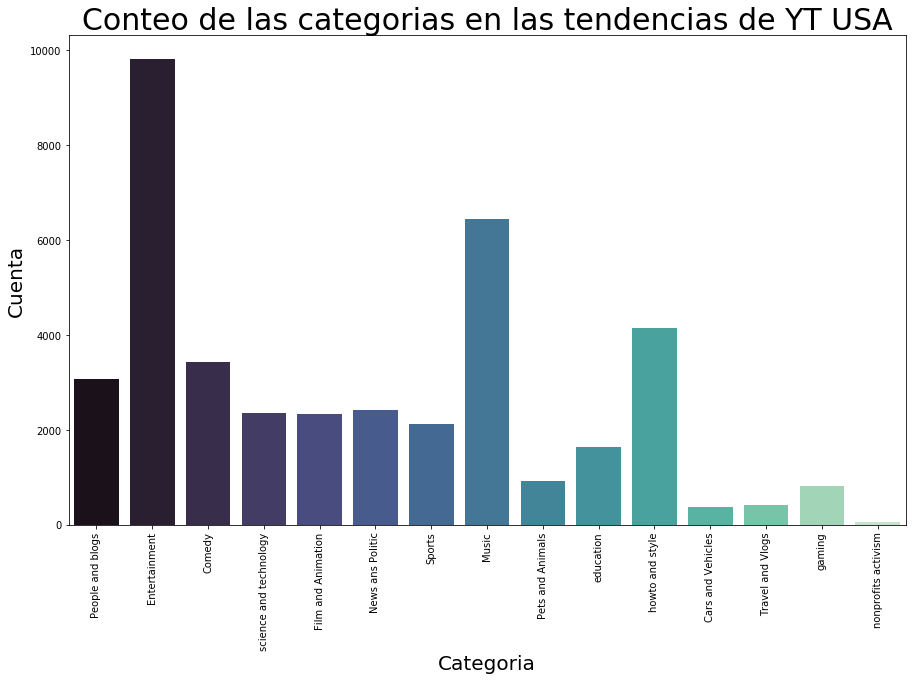

In [21]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(dfyu['categoria'], palette = 'mako')

plt.title('Conteo de las categorias en las tendencias de YT USA', fontweight = 30, fontsize = 30)
plt.xlabel('Categoria',fontsize = 20)
plt.ylabel('Cuenta',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

**Palabras mas usadas en el titulo, descripcion y titulo+descripcion de tendencias de YT USA**

Obtendremos las palabras mas usadas en la columna de titulo por razones de graficacion solo contaremos las 10 palabras mas usadas para cada columna

**Titulo**

In [22]:
Words = []
for oracion in dfyu.titulo:
    words = oracion.split() 
    for j in range(len(words)):
        Words.append(words[j])
frecuencia = Counter(Words)
df = pd.DataFrame.from_dict(frecuencia, orient='index').reset_index()
frecuentes = df.sort_values(0, ascending = False)
mas_frecuentes = frecuentes.head(10)

In [23]:
feature_names = mas_frecuentes["index"].tolist()
repetido = mas_frecuentes[0].tolist()

Text(0, 0.5, 'Variables')

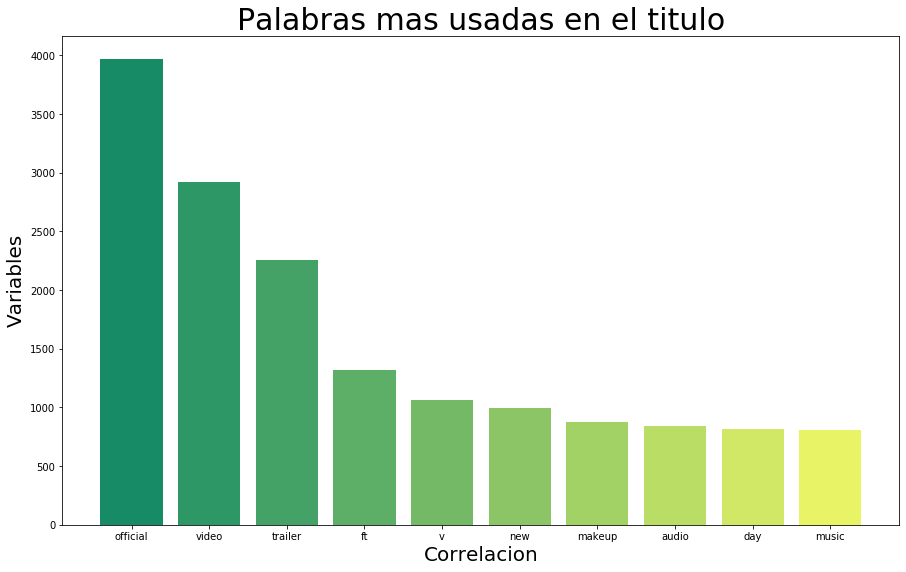

In [24]:
feature_names = mas_frecuentes["index"]
plt.bar(feature_names,repetido, color = sns.color_palette("summer",len(feature_names)))
plt.title('Palabras mas usadas en el titulo', fontweight = 30, fontsize = 30)
plt.xlabel('Correlacion',fontsize = 20)
plt.ylabel('Variables',fontsize = 20)

**Descripcion**

In [25]:
Words = []
for oracion in dfyu.descripcion:
    words = oracion.split() 
    for j in range(len(words)):
        Words.append(words[j])
frecuencia = Counter(Words)
df = pd.DataFrame.from_dict(frecuencia, orient='index').reset_index()
frecuentes = df.sort_values(0, ascending = False)
mas_frecuentes = frecuentes.head(10)

In [26]:
feature_names = mas_frecuentes["index"].tolist()
repetido = mas_frecuentes[0].tolist()

Text(0, 0.5, 'Veces que se uso')

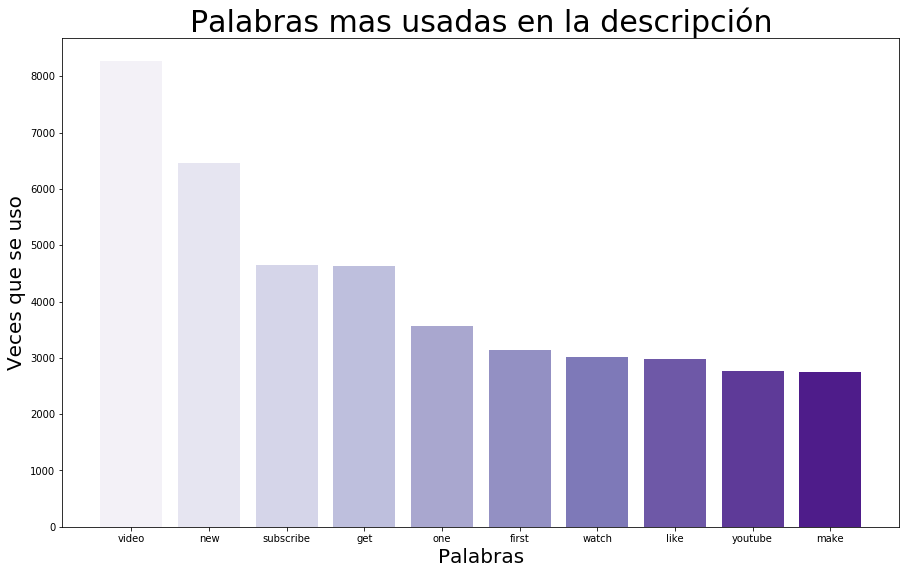

In [27]:
feature_names = mas_frecuentes["index"]
plt.bar(feature_names,repetido, color = sns.color_palette("Purples",len(feature_names)))
plt.title('Palabras mas usadas en la descripción', fontweight = 30, fontsize = 30)
plt.xlabel('Palabras',fontsize = 20)
plt.ylabel('Veces que se uso',fontsize = 20)

**Descripcion + Titulo**

In [28]:
Words = []
for oracion in dfyu["Titulo + Descripcion"]:
    words = oracion.split() 
    for j in range(len(words)):
        Words.append(words[j])
frecuencia = Counter(Words)
df = pd.DataFrame.from_dict(frecuencia, orient='index').reset_index()
frecuentes = df.sort_values(0, ascending = False)
mas_frecuentes = frecuentes.head(10)

In [29]:
feature_names = mas_frecuentes["index"].tolist()
repetido = mas_frecuentes[0].tolist()

Text(0, 0.5, 'Veces que se uso')

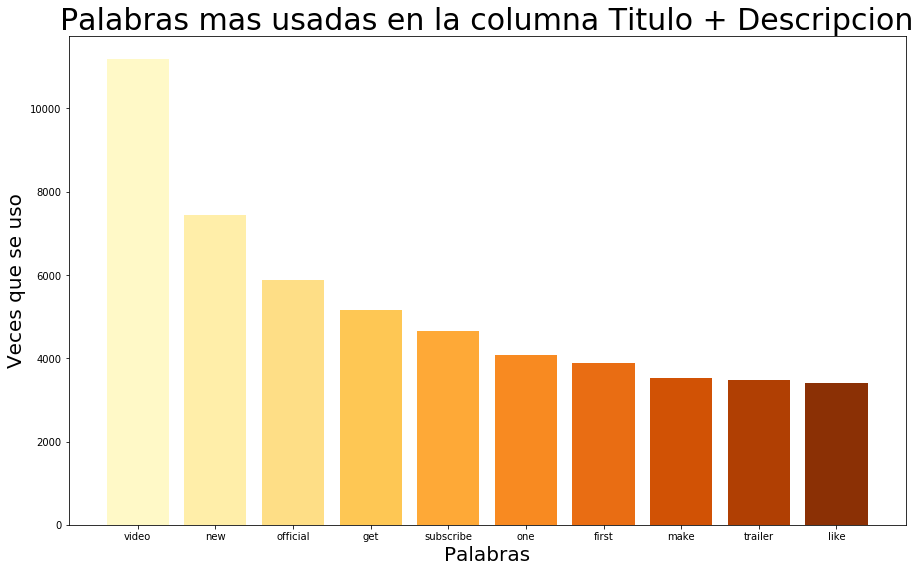

In [30]:
feature_names = mas_frecuentes["index"]
plt.bar(feature_names,repetido, color = sns.color_palette("YlOrBr",len(feature_names)))
plt.title('Palabras mas usadas en la columna Titulo + Descripcion', fontweight = 30, fontsize = 30)
plt.xlabel('Palabras',fontsize = 20)
plt.ylabel('Veces que se uso',fontsize = 20)

### Probando Modelo de Clasificacion con ejemplo simple(Multinomial Naive Bayes)

Aplicare el clasificador multinomial al df de tendencias de youtube para poder observar que tan bueno es el clasificador,
lo implementare utilizando el titulo, la descripcion y finalmente el titulo mas la descripcion para ver cual obtiene los mejores resultados, tanto el titulo como la descripcion seran la variable X y la variable Y o variable dependiente seran las categorias de youtube de esa forma en base a las caracteristicas de X sera el valor de Y, es lo que hara el modelo

**Probando NV con la combinacion de titulo y descripcion**

In [31]:
#Eliminamos los valores nulos ya que si los hay no funcionara el clasificador 
dfyu = dfyu.dropna()

In [32]:
#biblioteca que divide el conjunto de datos en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
#extrae las caracteristicas
from sklearn.feature_extraction.text import TfidfVectorizer
#extrae las caracteristicas y vectoriza estas
from sklearn.feature_extraction.text import CountVectorizer
#importamos el modelo a utilizar
from sklearn.naive_bayes import MultinomialNB
#biblioteca para calcular metricas
from sklearn.metrics import accuracy_score

Una vez que hemos importado las bibliotecas necesarias implementaremos el modelo lo primero que hay que hacer es crear tanto el conjunto de entrenamiento como el conjunto de prueba para eso como ya mencionamos la variable X sera la columna de descripcion mas titulo y la variable Y sera la categoria. Asignamos el 80% de los datos para entrenar el modelo y 20% para probar el modelo.

In [166]:
#Definimos el metodo a utilizar que es vectorizar las caracteristicas en base a n gramas de 1 y dos de longitud 
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
#tranformamos a la columna de titulo + descripcion en caracteristicas vectorizadas
X = cv.fit_transform(dfyu["Titulo + Descripcion"]).toarray()
#asignamos a Y los valores presentes en la columna de categoria 
y = dfyu['categoria'].values
#Definimos el conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [168]:
#definimos el modelo
nb_classifier = MultinomialNB()
#entrenamos el modelo 
nb_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [169]:
#probamos el modelo 
nb_y_pred = nb_classifier.predict(X_test)

In [171]:
#calculamos la eficacioa del modelo
score = accuracy_score(y_test, nb_y_pred)
score = score*100
score

85.16933610465827

**Probando NV con el titulo**

In [174]:
#Definimos el metodo a utilizar que es vectorizar las caracteristicas en base a n gramas de 1 y dos de longitud 
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
#tranformamos a la columna de titulo en caracteristicas vectorizadas
X = cv.fit_transform(dfyu["titulo"]).toarray()
#asignamos a Y los valores presentes en la columna de categoria 
y = dfyu['categoria'].values
#Definimos el conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [175]:
#definimos el modelo
nb_classifier = MultinomialNB()
#entrenamos el modelo
nb_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [177]:
#Validamos el modelo
nb_y_pred = nb_classifier.predict(X_test)

In [178]:
#Calculamos el score de eficacia del modelo 
score = accuracy_score(y_test, nb_y_pred)
score = score*100
score

84.97371316786894

**Probando NV con la descripcion**

In [179]:
#Definimos el metodo a utilizar que es vectorizar las caracteristicas en base a n gramas de 1 y dos de longitud 
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
#tranformamos a la columna de descripcion en caracteristicas vectorizadas
X = cv.fit_transform(dfyu["descripcion"]).toarray()
#asignamos a Y los valores presentes en la columna de categoria 
y = dfyu['categoria'].values
#Definimos el conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [180]:
#definimos el modelo
nb_classifier = MultinomialNB()
#entrenamos el modelo
nb_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [182]:
#validamos el modelo
nb_y_pred = nb_classifier.predict(X_test)

In [183]:
#calculamos el score de eficacia del modelo
score = accuracy_score(y_test, nb_y_pred)
score = score*100
score

80.67000855850348

<BarContainer object of 3 artists>

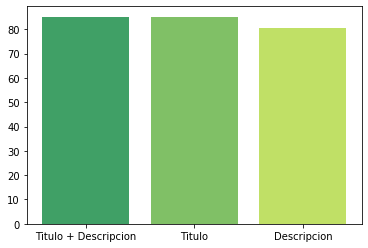

In [536]:
modelos = ["Titulo + Descripcion","Titulo", "Descripcion"]
scores = [85.16933610465827,84.97371316786894,80.67000855850348]
plt.bar(modelos,scores, color = sns.color_palette("summer",len(modelos)))

Como podemos ver el clasificador Naive Bayes es bastante bueno a la hora de realizar tareas de clasificacion ya que tiene resultados por arribas del 80% de eficacia, por lo que valida la idea de que Naive Bayes fue una buena eleccion para llevar acabo este proyecto, en la grafica podemos observar que los modelos entrenados con el titulo + la descripcion y con solo el titulo presentan los mejores resultados por lo que podemos intuir dos cosas la primera es que entre mas palabras se tengan mejores son las caracteristicas extraidas y por lo tanto mejores los resultados, y en segundo lugar es que las palabras en los titulos son muchos mas significativas que las que existen en la descripcion

# Crimen en New York

El DF de crimen en New York fue sacado de Kaggle y contiene los delitos en la ciudad de New York durante 2017 y 2018, cuenta con 946583 renglones es decir cuenta con la descripcion de 946583 delitos afectuados en la ciudad de New York descritos en 35 columnas como delito, fecha en que se efectuo el delito, barrio en que se efectuo el delito, hora en que se efectuo el delito, coordenadas exactas del delito, etc.

In [33]:
df_crimen_ny = pd.read_csv("NYPD_Complaint_Data_Historic.csv")

C:\Users\mjsto\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [311]:
df_crimen_ny.head(3)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,950070880,01/01/2017,00:15:00,01/01/2017,00:20:00,112.0,01/01/2017,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,F,NaN,40.734002,-73.856561,"(40.734002432, -73.85656091)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE,F
1,305770983,01/01/2017,02:55:00,01/01/2017,03:34:00,47.0,01/01/2017,233,SEX CRIMES,175.0,...,NaN,12.0,40.887451,-73.847608,"(40.887451313, -73.847607787)",PATROL BORO BRONX,DYRE AVE.-EASTCHESTER,25-44,BLACK,F
2,278104967,01/01/2017,03:08:00,NaN,NaN,73.0,01/02/2017,341,PETIT LARCENY,321.0,...,NaN,NaN,40.664807,-73.922212,"(40.66480676, -73.922211641)",PATROL BORO BKLYN NORTH,NaN,25-44,BLACK,M


In [35]:
df_crimen_ny["OFNS_DESC"].value_counts().sum()

946541

### Preprocesamiento de los datos

Lo primero para iniciar con el procesamiento de los datos es obtener las columnas de interes para nuestro estudio, por lo que primero cree un dataframe nuevo solo con las columnas de interes para nuestro estudio

In [36]:
dfny =pd.DataFrame(df_crimen_ny["CMPLNT_FR_DT"])
dfny["Hora"] = df_crimen_ny["CMPLNT_FR_TM"]
dfny["Descripcion_Delito"] = df_crimen_ny["OFNS_DESC"]
dfny["Sexo"] = df_crimen_ny["SUSP_SEX"]
dfny["Grupo"] = df_crimen_ny["VIC_RACE"]
dfny["Edad"] = df_crimen_ny["VIC_AGE_GROUP"]
dfny.rename(columns={'CMPLNT_FR_DT': 'Fecha'}, inplace=True)

Limpiamos la columna de descripcion del delito ya que encontramos diferentes variantes de un mismo delito por ejemplo Robo y robo lo cual se podria interpretar como dos delitos diferentes por lo que para generalizar los delitos y que no sucedan este tipo de errores decidi limpiar la columna de descripcion del delito 

In [37]:
dfny["Descripcion_Delito"] = limpieza(dfny["Descripcion_Delito"])

In [38]:
dfny.head(4)

,Fecha,Hora,Descripcion_Delito,Sexo,Grupo,Edad
0,01/01/2017,00:15:00,assault related offense,F,WHITE,25-44
1,01/01/2017,02:55:00,sex crime,NaN,BLACK,25-44
2,01/01/2017,03:08:00,petit larceny,NaN,BLACK,25-44
3,01/01/2017,09:30:00,assault related offense,M,BLACK,25-44


### Obtener datos de el conjunto de datos de New York

**Numero de delitos en New York**

In [39]:
df = dfny.Descripcion_Delito.value_counts().rename_axis('unique_values').reset_index(name='counts')
mas_frecuentes = df.unique_values.head(15).tolist()
val_frecuentes = df.counts.head(15).tolist()

In [40]:
dfny.Descripcion_Delito.value_counts()

petit larceny                172918
harrassment                  138391
assault related offense      105243
criminal mischief related     98092
grand larceny                 90016
                              ...  
unlawful po weap school           4
disruption religious serv         2
abortion                          2
loitering                         2
state law non penal law           1
Name: Descripcion_Delito, Length: 63, dtype: int64

In [41]:
len(dfny.Descripcion_Delito.value_counts())

63

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

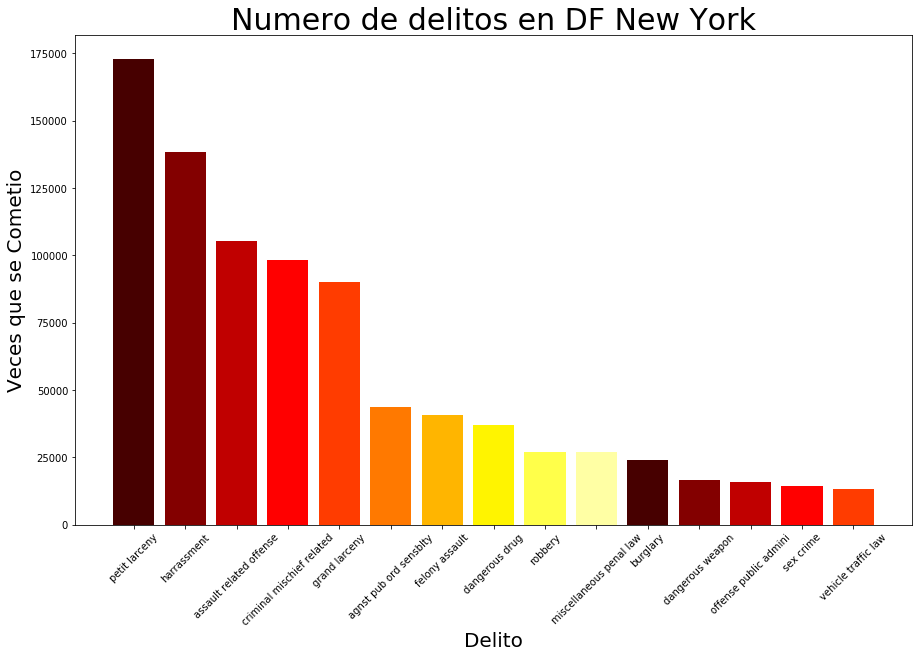

In [42]:

plt.bar(mas_frecuentes,val_frecuentes, color = sns.color_palette("hot",len(feature_names)))
plt.title('Numero de delitos en DF New York', fontweight = 30, fontsize = 30)
plt.xlabel('Delito',fontsize = 20)
plt.ylabel('Veces que se Cometio',fontsize = 20)
plt.xticks(rotation = 45)

**Grupo**

In [43]:
df = dfny.Grupo.value_counts().rename_axis('unique_values').reset_index(name='counts')
delitos = df.unique_values.tolist()
n_delitos = df.counts.tolist()

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

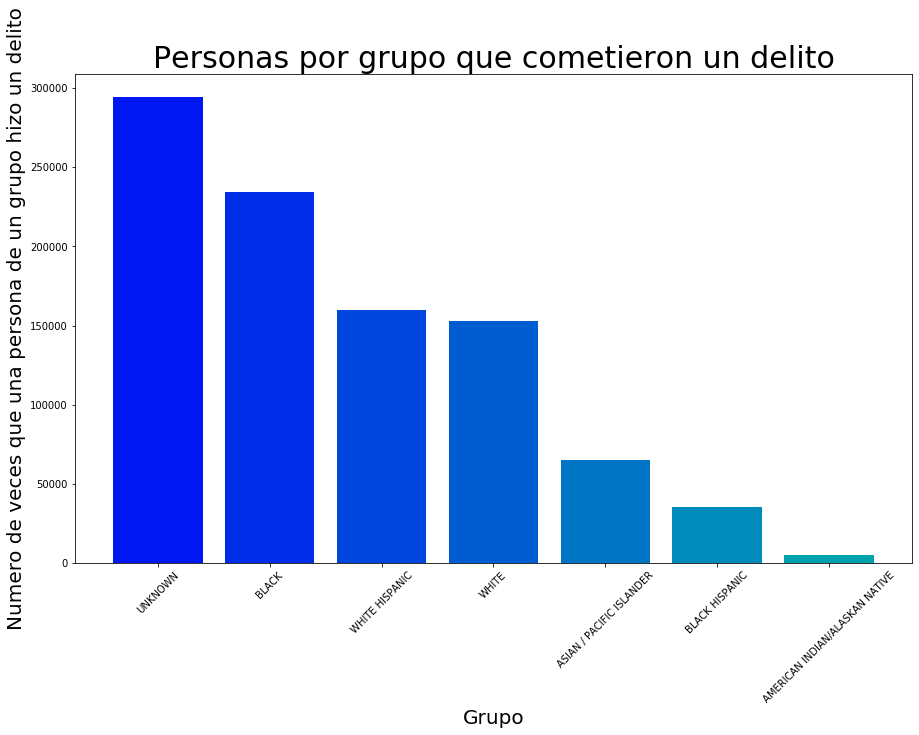

In [44]:
plt.bar(delitos,n_delitos, color = sns.color_palette("winter",len(feature_names)))
plt.title('Personas por grupo que cometieron un delito', fontweight = 30, fontsize = 30)
plt.xlabel('Grupo',fontsize = 20)
plt.ylabel('Numero de veces que una persona de un grupo hizo un delito',fontsize = 20)
plt.xticks(rotation = 45)

**Sexo**

In [50]:
df = dfny.Sexo.value_counts().rename_axis('unique_values').reset_index(name='counts')
sexo = ["Masculino","No_especifica","Femenino"]
n_delitos = df.counts.tolist()

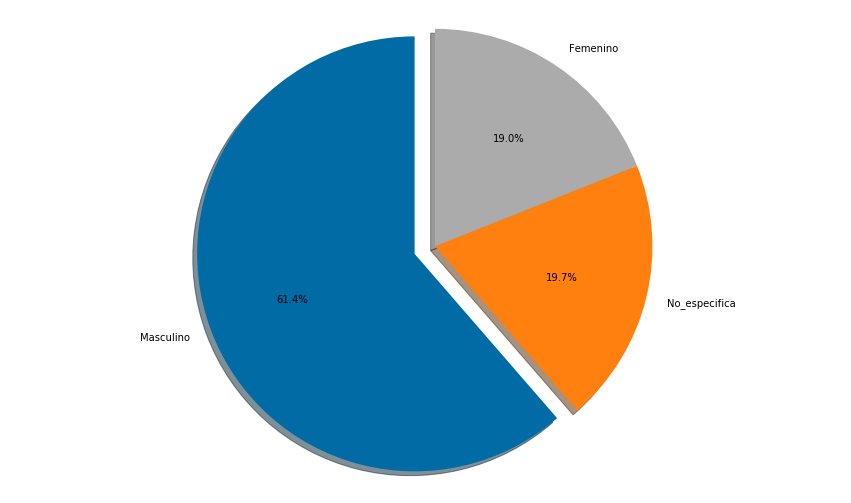

In [51]:
labels = sexo
sizes = n_delitos
explode = (0.1, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

**Edad**

In [52]:
df = dfny.Edad.value_counts().rename_axis('unique_values').reset_index(name='counts')
edad = df.unique_values.tolist()
n_delitos = df.counts.tolist()

In [53]:
edad[0:10]

['25-44',
 'UNKNOWN',
 '45-64',
 '18-24',
 '<18',
 '65+',
 '-962',
 '-974',
 '-3',
 '-2']

No se pudo analizar la columna de edad por la enorme cantidad de valores en formato raro y sin coherencia por lo que ni con una limpieza esta columna podria ser analizada

**Obtener el delito mas comun por dia**

Obtendre el delito mas comun por dia ya que de esa forma obtendremos una vista general de como fue ese dia en cuestion de delitos y dado que nuestro conjunto de datos de youtube tiene las tendencias por dia es mas apropiado hacer eso si bien se pierde mucha informacion es la unica forma factible de llevar acabo el estudio de forma realista

In [54]:
#Obtenemos las fechas unicas de nuestro set de datos, es decir los dias unicos en que se cometio un delito ya que existen
#varios delitos en el mismo dia
fechas = list(dfny["Fecha"].unique())
len(fechas)

730

Ahora sabemos que tenemos mas de 730 dias distintos es decir tenemos los delitos de dos años completos por lo que ahora que ya tenemos las fechas de los dias en que se llevo acabo un delito tenemos que contar todos los delitos cometidos en ese dia y quedarnos con el delito que mas veces se cometio ese dia de esa forma tenemos un panorama general de lo que ocurrio ese dia 

In [55]:
from collections import Counter
#lista que guardara la fecha del delito
fecha_delito = []
#lista con los delitos mas comunes por dia 
delito_dia = []
#iteramos cada fecha unica es decir cada dia de los dos que tenemos
for fecha in fechas:
    #se llena con el dia sobre el cual se hace la operacion 730 en total
    fecha_delito.append(fecha)
    #la varibale a obtiene todas las filas que coinciden con el dia que estamos iterando
    #en otras palabras creamos un submarco de datos solo con los datos de la fecha que iteramos
    a = dfny[dfny["Fecha"]== fecha]
    #la variable b obtiene los delitos del subconjunto de marcos creado con a y la convierte en 
    #una lista y cuenta la frecuancia en la que aparece cada lista
    b = Counter((list(a["Descripcion_Delito"])))
    #c obtiene el valor maximo es decir el delito mas frecuente sin embargo solo obtiene un numero 
    #pero no podriamos saber que delito es el mas comun
    c = max(b.values())
    #la variable moda corresponde a encontrar el valor de lista mas repetido 
    moda = {key for key, count in b.items() if count == c}
    #llenamos la lista de los delitos mas comunes por dia
    delito_dia.append(moda)

In [56]:
#Obtenemos el tipo de los elementos de nuestra lista de delitos mas comunes 
type(delito_dia[0])

set

In [57]:
#Si bien tenemos el delito mas comun por dia en una lista cada elemento de esta lista es un objeto del tipo
#set por lo que tenemos que convertirlo en una cadena del tipo string de esa forma es mas facil trabajar con el 
delito_comun=[]
for i in range(0,len(delito_dia)):
    a_set = delito_dia[i]
    list_of_strings = [str(s) for s in a_set]
    joined_string = " ".join(list_of_strings)
    delito_comun.append(joined_string)

In [58]:
#Comprobamos que ya los elementos son del tipo string
type(delito_comun[0])

str

**Creamos un nuevo dataframe solo con los delitos mas comunes y su fecha correspondiente**

In [59]:
ny_del= DataFrame(delito_comun, columns = ['Crimen'])
ny_del["fecha"]=fecha_delito

Ya que obtuvimos los delitos mas comunes de cada dia durante los dos años que tenemos informacion es hora de asignar ese delito mas comun a los videos de tendencia que tenemos en youtube de esa forma sabremos que delito fue el mas comun cuando estaba determinada tendencia 

### Unir los conjuntos de datos para entrenar el modelo

**Correccion de la fecha**

Para llevar acabo la union de los conjuntos de datos tenemos que tener alguna caracteristica en comun para que de esa forma tengamos algun punto de referencia para unir los conjuntos en este caso sera por la fecha ya que ambos comparten ese atributo sin embargo el formato en que se encuentra la fecha en los conjuntos de datos difiere por lo que hay que hacer que estos sean iguales

In [60]:
dfyu.head(2)

,titulo,descripcion,fecha,categoria,Titulo + Descripcion
0,want talk marriage,shantells channel,2017-11-13T17:13:01.000Z,People and blogs,want talk marriage shantells channel
1,trump presidency last week tonight john oliver...,one year presidential election john oliver dis...,2017-11-13T07:30:00.000Z,Entertainment,trump presidency last week tonight john oliver...


In [61]:
ny_del.head(2)

,Crimen,fecha
0,criminal mischief related,01/01/2017
1,petit larceny,01/02/2017


In [62]:
#Obtenemos las Fechas a corregir
fechas_a_corregir = list(dfyu["fecha"])

In [63]:
#lista donde se guardaran las fechas corregidas
fecha_corregida = []
#iteramos sobre cada fecha del df que vamos a corregir
for i in fechas_a_corregir:
    #el año son los 4 primeros digitos de la fecha
    año = i[:4]
    #el mes se encuentra entre el 5-7 valor de la cadena
    mes = i[5:7]
    #el dia son el caracter 8 al 10
    dia = i[8:10]
    #Solo conservamos año, mes y fecha ya que los otros datos no 
    #son de gran interes para nosotros 
    #le damos el formato ademas de sustituir los guiones por diagonales
    fecha = mes+"/"+dia+"/"+año
    #llenamos la lista de fechas corregidas con cada fecha corregida 
    #que obtenemos del ciclo for 
    fecha_corregida.append(fecha)

In [64]:
#reemplazamos los valores de la fecha por los de nuestras fechas corregidas 
dfyu["fecha"]= fecha_corregida

**Crear diccionario**

Ahora que ya corregimos la fecha del set de datos de youtube y tenemos un punto en comun para unirlos tenemos que buscar un metodo para poder llevar acabo la union entonces tomando el df que obtuvimos de el delito mas comun por dia crearemos un diccionario que use como llave la fecha y su valor sea el crimen.

In [65]:
ny_dicc =ny_del.set_index('fecha')['Crimen'].to_dict()

**Unir DataFrames**

Ya con el diccionario y con la fecha corregida en el conjunto de datos de youtube ahora procederemos a asignar un delito mas comun a cada video de tendencia.

In [66]:
dfyu.isnull().sum()

titulo                  0
descripcion             0
fecha                   0
categoria               0
Titulo + Descripcion    0
dtype: int64

Observamos que no hay valores nulos lo cual es bueno sin embargo lo que haremos sera crear un columna de delito con solo valores nan

In [67]:
#definimos un 
dfyu["delito"] = np.nan

Una vez que tenemos la columna de delitos con valores NaN lo que haremos sera reemplazar el valor de cada linea de esa columna mediante el diccionario de delitos mas comunes tomando en cuenta la fecha que posee esa linea y usarla como llave para tener un valor en el diccionario

In [68]:
#lista donde se almacenan fechas
fechas = []
#contador que itera sobre el indice de las lineas del dataframe
contador = 0;
#iteramos sobra cada linea de fecha de nuestro set de datos
for fecha in dfyu["fecha"]:
    #una vez que obtenemos la fecha verificamos si esta en el diccionario
    if fecha in ny_dicc.keys():
        #si lo esta la usamos como llave y obtenemos un valor
        delito = ny_dicc[fecha]
        #asignamos ese valor al indice de la linea que marca nuestro contador
        dfyu["delito"].iloc[contador] = delito 
        fechas.append(delito)
    #aumentamos el contador
    contador += 1

C:\Users\mjsto\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [69]:
dfyu.isnull().sum()

titulo                    0
descripcion               0
fecha                     0
categoria                 0
Titulo + Descripcion      0
delito                  211
dtype: int64

Verificamos nuestro DF y observamos que este fue llenado de forma excelente solo 211 casillas de fecha no se encontraron en en el diccionario por lo cual procederemos a eliminarlas ya que son fechas con valores atipicos como una tendencia del 2006 o una del 2007 y dado que nuestro rango de estudio es 2018 y 2017 eliminarlas es lo mejor y tomando en cuenta que son solo 211 lineas de mas de 40 mil el modelo no tiene por que verse afectado 

In [70]:
dfyu

,titulo,descripcion,fecha,categoria,Titulo + Descripcion,delito
0,want talk marriage,shantells channel,11/13/2017,People and blogs,want talk marriage shantells channel,petit larceny
1,trump presidency last week tonight john oliver...,one year presidential election john oliver dis...,11/13/2017,Entertainment,trump presidency last week tonight john oliver...,petit larceny
2,racist superman rudy mancuso king bach lele pons,watch previous video nnsubscribe,11/12/2017,Comedy,racist superman rudy mancuso king bach lele po...,petit larceny
3,nickelback lyric real fake,today find link nickelback amateur secret nick...,11/13/2017,Entertainment,nickelback lyric real fake today find link nic...,petit larceny
4,dare going bald,know since show back might best episode yetnle...,11/12/2017,Entertainment,dare going bald know since show back might bes...,petit larceny
...,...,...,...,...,...,...
40943,bts play puppy answering fan question,bts pps puppy adorable puppy provided vanderpu...,05/18/2018,People and blogs,bts play puppy answering fan question bts pps ...,petit larceny
40944,cat caught laser,cat caught laser aaron animal,05/18/2018,Pets and Animals,cat caught laser cat caught laser aaron animal,petit larceny
40946,gave safiya nygaard perfect hair makeover base...,much fun transforming safiyas hair video servi...,05/18/2018,Entertainment,gave safiya nygaard perfect hair makeover base...,petit larceny
40947,black panther ended,black panther endedwatch hishes,05/17/2018,Film and Animation,black panther ended black panther endedwatch h...,petit larceny


In [71]:
dfyu = dfyu.dropna()

In [72]:
dfyu

,titulo,descripcion,fecha,categoria,Titulo + Descripcion,delito
0,want talk marriage,shantells channel,11/13/2017,People and blogs,want talk marriage shantells channel,petit larceny
1,trump presidency last week tonight john oliver...,one year presidential election john oliver dis...,11/13/2017,Entertainment,trump presidency last week tonight john oliver...,petit larceny
2,racist superman rudy mancuso king bach lele pons,watch previous video nnsubscribe,11/12/2017,Comedy,racist superman rudy mancuso king bach lele po...,petit larceny
3,nickelback lyric real fake,today find link nickelback amateur secret nick...,11/13/2017,Entertainment,nickelback lyric real fake today find link nic...,petit larceny
4,dare going bald,know since show back might best episode yetnle...,11/12/2017,Entertainment,dare going bald know since show back might bes...,petit larceny
...,...,...,...,...,...,...
40943,bts play puppy answering fan question,bts pps puppy adorable puppy provided vanderpu...,05/18/2018,People and blogs,bts play puppy answering fan question bts pps ...,petit larceny
40944,cat caught laser,cat caught laser aaron animal,05/18/2018,Pets and Animals,cat caught laser cat caught laser aaron animal,petit larceny
40946,gave safiya nygaard perfect hair makeover base...,much fun transforming safiyas hair video servi...,05/18/2018,Entertainment,gave safiya nygaard perfect hair makeover base...,petit larceny
40947,black panther ended,black panther endedwatch hishes,05/17/2018,Film and Animation,black panther ended black panther endedwatch h...,petit larceny


In [73]:
dfyu.isnull().sum()

titulo                  0
descripcion             0
fecha                   0
categoria               0
Titulo + Descripcion    0
delito                  0
dtype: int64

Observamos que ahora ya tenemos un conjunto de datos mixto que une el set de crimen de new york con el de tendencias de youtube en donde cada tendencia tiene un crimen asociado de esa forma podremos abordar un tema de clasificacion en el que en base a los atributos de titulo y descripcion el modelo intentara clasificar un delito 

## Obteniendo informacion del conjunto de datos crimen +Yotube

**Delito mas comun por categoria**

In [176]:
graficar = pd.DataFrame()
graficar = dfyu.categoria.unique().tolist()


In [177]:
graficar["categoria"] = dfyu.categoria.unique()
graficar["petit_larceny"] = np.nan
graficar['harrassment'] = np.nan
graficar['criminal mischief related'] = np.nan
graficar['assault related offense'] = np.nan
graficar['petit larceny harrassment'] = np.nan
cuenta = dfyu[dfyu.delito == "petit larceny"]
cuenta1 = dfyu[dfyu.delito == 'harrassment']
cuenta2 = dfyu[dfyu.delito == 'criminal mischief related']
cuenta3 = dfyu[dfyu.delito == 'assault related offense']
cuenta4 = dfyu[dfyu.delito == 'petit larceny harrassment']

In [230]:
#Cambiamos el valor segun el delito que buscamos
cuenta4.categoria.value_counts()
df = cuenta4.categoria.value_counts().rename_axis('unique_values').reset_index(name='counts')
ny_dicc =df.set_index('unique_values')['counts'].to_dict()

In [233]:
contador = 0;
for i in graficar["categoria"]:
    if i in ny_dicc.keys():
        #intercambiamos el nombre de la columna segun el que queramos llenar
        graficar['petit larceny harrassment'][contador] = ny_dicc[i]
    contador += 1

C:\Users\mjsto\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [235]:
graficar.head(3)

,categoria,petit_larceny,harrassment,criminal mischief related,assault related offense,petit larceny harrassment
0,People and blogs,2957.0,76.0,7.0,6.0,1.0
1,Entertainment,9237.0,452.0,28.0,35.0,17.0
2,Comedy,3251.0,161.0,2.0,14.0,4.0


In [242]:
graficar = pd.DataFrame(graficar)

Text(0.5, 1.0, 'Relacion Delito-Categoria')

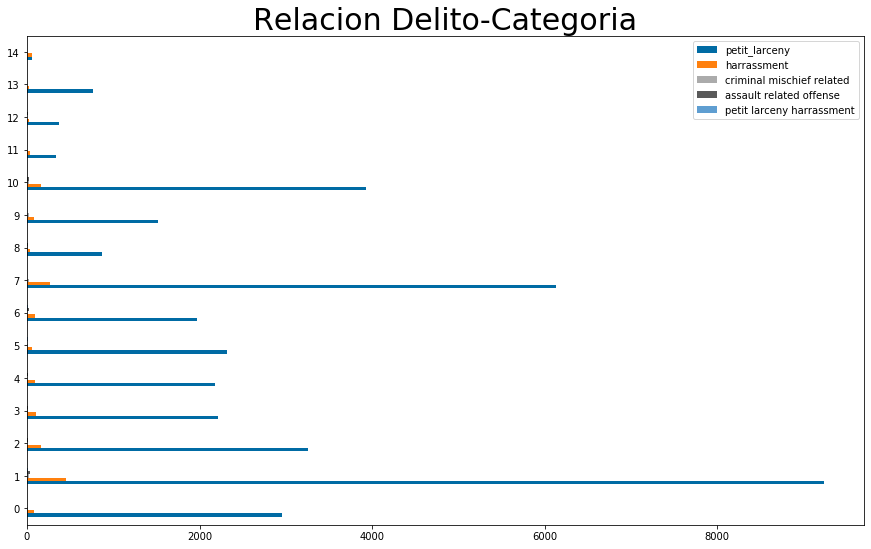

In [240]:
graficar.plot(kind = 'barh')
plt.title('Relacion Delito-Categoria', fontweight = 30, fontsize = 30)

**Dias con Mas delitos**

In [247]:
df = dfyu.fecha.value_counts().rename_axis('dias').reset_index(name='cuenta')
comunes = df.head(15)

In [249]:
dia_co = comunes.dias.tolist()
cuent = comunes.cuenta.tolist()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

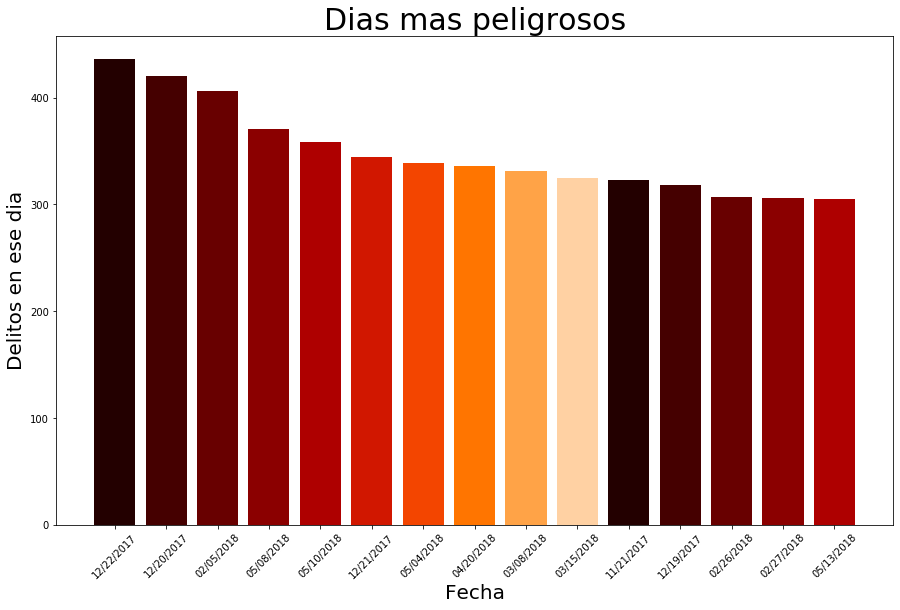

In [253]:
plt.bar(dia_co,cuent, color = sns.color_palette("gist_heat",len(feature_names)))
plt.title('Dias mas peligrosos', fontweight = 30, fontsize = 30)
plt.xlabel('Fecha',fontsize = 20)
plt.ylabel('Delitos en ese dia',fontsize = 20)
plt.xticks(rotation = 45)

## Palabra mas comun por crimen

**Robo Menor**

In [254]:
dfyu.delito.unique()

array(['petit larceny', 'harrassment', 'criminal mischief related',
       'assault related offense', 'petit larceny harrassment'],
      dtype=object)

In [280]:
robo = dfyu[dfyu.delito=="petit larceny"]
text = " ".join(frase for frase in robo["Titulo + Descripcion"])


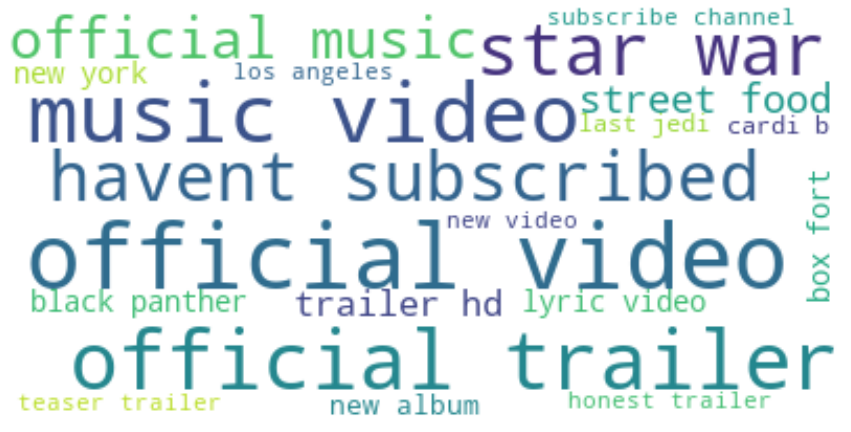

In [282]:
wordcloud = WordCloud( max_words=20, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [285]:
Words = []
for oracion in robo["Titulo + Descripcion"]:
    words = oracion.split() 
    for j in range(len(words)):
        Words.append(words[j])
frecuencia = Counter(Words)
df = pd.DataFrame.from_dict(frecuencia, orient='index').reset_index()
frecuentes = df.sort_values(0, ascending = False)
mas_frecuentes = frecuentes.head(10)

In [286]:
mas_frecuentes

,index,0
47,video,10658
62,new,6971
125,official,5563
299,get,4813
233,subscribe,4393
13,one,3816
504,first,3596
263,make,3352
126,trailer,3276
45,watch,3256


**Acoso**

In [289]:
robo = dfyu[dfyu.delito=="harrassment"]
text = " ".join(frase for frase in robo["Titulo + Descripcion"])

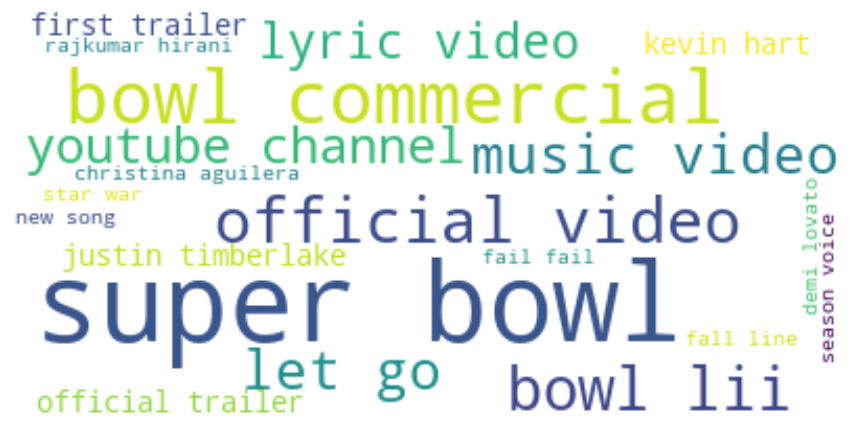

In [290]:
wordcloud = WordCloud( max_words=20, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [292]:
Words = []
for oracion in robo["Titulo + Descripcion"]:
    words = oracion.split() 
    for j in range(len(words)):
        Words.append(words[j])
frecuencia = Counter(Words)
df = pd.DataFrame.from_dict(frecuencia, orient='index').reset_index()
frecuentes = df.sort_values(0, ascending = False)
mas_frecuentes = frecuentes.head(10)
mas_frecuentes

,index,0
37,video,408
22,new,364
1518,super,361
1640,bowl,357
105,official,306
288,film,262
140,get,249
601,first,220
30,subscribe,213
155,u,189


**travesuras criminales relacionadas**

In [293]:
robo = dfyu[dfyu.delito=="criminal mischief related"]
text = " ".join(frase for frase in robo["Titulo + Descripcion"])

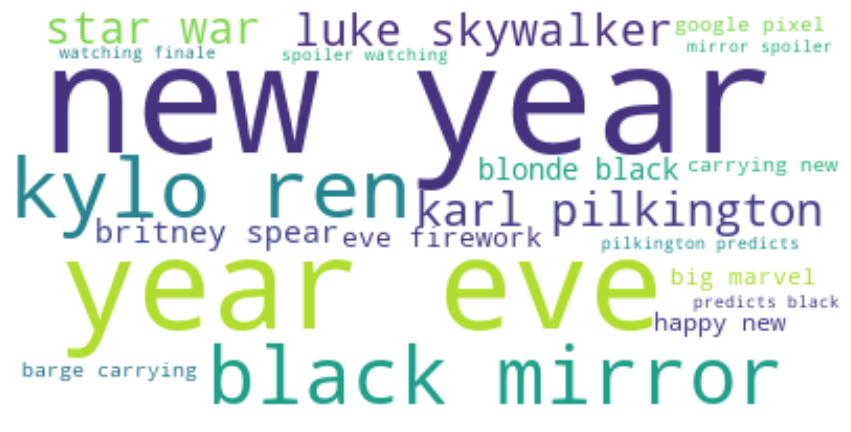

In [294]:
wordcloud = WordCloud( max_words=20, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [295]:
Words = []
for oracion in robo["Titulo + Descripcion"]:
    words = oracion.split() 
    for j in range(len(words)):
        Words.append(words[j])
frecuencia = Counter(Words)
df = pd.DataFrame.from_dict(frecuencia, orient='index').reset_index()
frecuentes = df.sort_values(0, ascending = False)
mas_frecuentes = frecuentes.head(10)
mas_frecuentes

,index,0
90,new,68
91,year,43
230,bread,36
135,video,35
92,eve,33
31,black,32
122,hair,28
73,bit,24
216,make,24
21,like,22


**delito relacionado con el asalto**

In [296]:
robo = dfyu[dfyu.delito=="assault related offense"]
text = " ".join(frase for frase in robo["Titulo + Descripcion"])

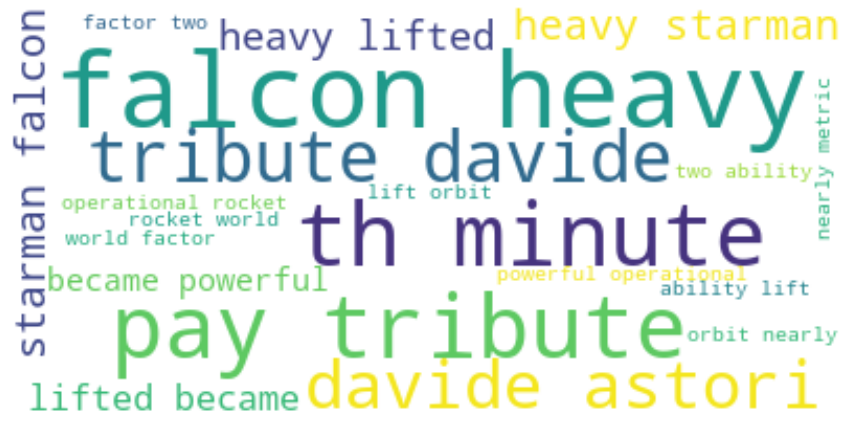

In [297]:
wordcloud = WordCloud( max_words=20, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [298]:
Words = []
for oracion in robo["Titulo + Descripcion"]:
    words = oracion.split() 
    for j in range(len(words)):
        Words.append(words[j])
frecuencia = Counter(Words)
df = pd.DataFrame.from_dict(frecuencia, orient='index').reset_index()
frecuentes = df.sort_values(0, ascending = False)
mas_frecuentes = frecuentes.head(10)
mas_frecuentes

,index,0
446,heavy,75
447,starman,45
233,travel,43
454,two,41
76,day,38
257,world,36
67,year,36
26,video,34
457,orbit,30
456,lift,30


**petit larceny harrassment**

In [299]:
robo = dfyu[dfyu.delito=="petit larceny harrassment"]
text = " ".join(frase for frase in robo["Titulo + Descripcion"])

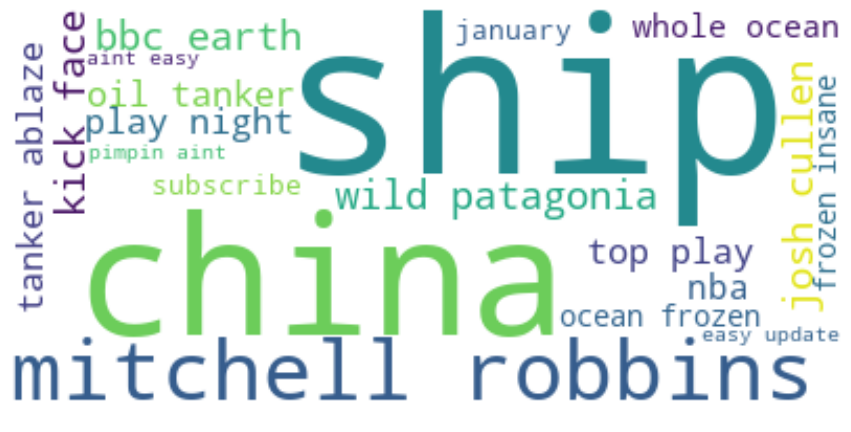

In [300]:
wordcloud = WordCloud( max_words=20, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [301]:
Words = []
for oracion in robo["Titulo + Descripcion"]:
    words = oracion.split() 
    for j in range(len(words)):
        Words.append(words[j])
frecuencia = Counter(Words)
df = pd.DataFrame.from_dict(frecuencia, orient='index').reset_index()
frecuentes = df.sort_values(0, ascending = False)
mas_frecuentes = frecuentes.head(10)
mas_frecuentes

,index,0
79,ship,18
47,wild,18
145,play,17
38,subscribe,12
81,china,10
75,tanker,10
64,video,10
12,trying,9
157,top,9
162,nba,9


## Probando el modelo para predecir el crimen

**Con titulo y descripcion**

In [503]:
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(dfyu["Titulo + Descripcion"]).toarray()
y = dfyu['delito'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [504]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [505]:
nb_y_pred = nb_classifier.predict(X_test)

In [506]:
score = accuracy_score(y_test, nb_y_pred)
score = score*100
score

94.87722796958744

**Probando con solamente el titulo**

In [507]:
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(dfyu["titulo"]).toarray()
y = dfyu['delito'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [508]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [509]:
nb_y_pred = nb_classifier.predict(X_test)

In [510]:
score = accuracy_score(y_test, nb_y_pred)
score = score*100
score

96.0862520254269

**Probando con solamente la descripcion**

In [511]:
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(dfyu["descripcion"]).toarray()
y = dfyu['delito'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [512]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [513]:
nb_y_pred = nb_classifier.predict(X_test)

In [514]:
score = accuracy_score(y_test, nb_y_pred)
score = score*100
score

93.80530973451327

Observamos que el modelo es increiblemente bueno para predecir el delito mas comun en base a los titulos y descripciones de los videos de tendencias de youtube sin embargo esto se puede deber a que existen muy pocas  